In [1]:
# import multi tracker analysis
import multi_tracker_analysis as mta

ImportError: No module named 'multi_tracker_analysis'

In [2]:
# load hdf5 data as a pandas dataframe, and load the configuration
# change the argument to match your data path!
pd, config = mta.read_hdf5_file_to_pandas.load_and_preprocess_data('/home/lab/catkin/src/multi_tracker/examples/sample_data/20160412_134708_N1_trackedobjects.hdf5')

NameError: name 'mta' is not defined

In [28]:
# pandas dataframe structure: each row is a measurement corresponding to one of the objects for each frame
pd.keys()

Index([u'angle', u'area', u'frames', u'measurement_x', u'measurement_y',
       u'objid', u'position_x', u'position_y', u'time_epoch_nsecs',
       u'time_epoch_secs', u'velocity_x', u'velocity_y', u'time_epoch',
       u'speed'],
      dtype='object')

In [29]:
# show the object id's
import numpy as np
np.unique(pd.objid)

array([    0,     1,     2, ..., 53569, 53570, 53571])

In [30]:
position_for_10 = pd[pd.objid==10].position_x.values
position_for_10

array([ 1424.,  1424.,  1424.])

In [31]:
# wrap pandas dataframe into a dataset object for intuitive processing
# note: using copy=True creates a copy of the data
#       this allows you to add attributes to trajecties and pickle the dataset structure for future use
dataset = mta.read_hdf5_file_to_pandas.Dataset(pd, config=config)
dataset.load_keys() # load the object ids
trajec = dataset.trajec(dataset.keys[7]) # load the 7th trajectory
trajec.position_x # show the position x data

array([ 612.        ,  612.        ,  612.        ,  620.04771372])

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

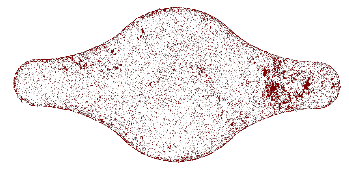

In [33]:
# plot the trajectory; this requires downloading my plotting library: https://github.com/florisvb/FlyPlotLib
# make a heatmap of the trajectories
bgimg = mta.plot.get_filename(config.path, 'bgimg')
binsx, binsy = mta.plot.get_bins_from_backgroundimage(bgimg)
mta.plot.plot_trajectories(pd, binsx, binsy)

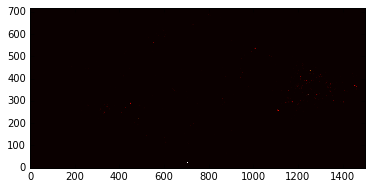

In [34]:
mta.plot.plot_heatmap(pd, binsx, binsy)

In [ ]:
-

In [ ]:
#lf & rt occupancy v. time
#same problem as above
b = []
position = []
trajec = dataset.trajec(dataset.keys[5])
time = len(trajec.position_x)
for i in range(len(np.unique(pd.objid))):
        trajec = dataset.trajec(dataset.keys[i])
        position.append(trajec.position_x)
for i in range (time):
        rt = (np.sum(position[:,i]<700))
        lf = len(position)-rt
        b.append([lf,rt])
        rt =0
        lf =0
#plot blobs on lf or rt w/ odor pulses
plt.plot(b)
plt.ylabel('flies')
plt.xlabel('time')
odor_pulse = []
lf_edge=0
rt_edge=2
#y_max = max(b)  
#print y_max
for i in range(int(math.ceil(frames/30))):
        lf_edge= lf_edge+28
        rt_edge= rt_edge+28
        plt.axvspan(lf_edge, rt_edge, 0, 40, alpha=0.5, color= 'yellow')
plt.show()



In [ ]:
#avg walking speed v. time
#use .speed?
#assuming that once an object get tracked, it stays until end of video
speed = []
max_len = 0
for i in range (len(np.unique(pd.objid))):
    trajec = dataset.trajec(dataset.keys[i])
    speed.append(trajec.speed)
for i in range (len(speed)):
    curr_len  = len(speed[i ,:])
    if curr_len > max_len:
        max_len = curr_len

    